In [1]:

import sys
sys.path.insert(0, '../')
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import re
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from jupyterthemes import jtplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import itertools
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest





In [2]:
train_1 = pd.read_csv('train_1.csv')

In [3]:
# loading the dataset 
train_1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [2]:
##function used to melt data to return each page as a seperate occurance at a specific point in time  
def find_language(url):
    res = re.search('[a-z][a-z].wikipedia.org', url)
    if res:
        return res[0][0:2]
    return 'na'


def data_per_date(data):

    data1 = data.copy()
    temp = data1.Page.str.rsplit("_", expand=True, n=3)

    data1['lang'] = data1.Page.map(find_language)
    data1['Page'] = temp[0]
    data1['Type_of_traffic'] = temp[2]
    data1['Agent'] = temp[3]

    data_melted = pd.melt(data1, id_vars=['Page', 'Type_of_traffic', 'Agent', 'lang'],
                          var_name='Date', value_name='count')
    data_melted['Date'] = data_melted['Date'].astype('datetime64[ns]')

    return data_melted

In [7]:
data = data_per_date(train_1)

In [48]:
data.head()

,Page,Type_of_traffic,Agent,lang,Date,count
0,2NE1,all-access,spider,zh,2015-07-01,18.0
1,2PM,all-access,spider,zh,2015-07-01,11.0
2,3C,all-access,spider,zh,2015-07-01,1.0
3,4minute,all-access,spider,zh,2015-07-01,35.0
4,52_Hz_I_Love_You,all-access,spider,zh,2015-07-01,NaN
...,...,...,...,...,...,...
577015,Clint_Eastwood,all-access,spider,es,2015-07-04,9.0
577016,Clonazepam,all-access,spider,es,2015-07-04,6.0
577017,Club_Deportivo_Guadalajara,all-access,spider,es,2015-07-04,54.0
577018,Club_Necaxa,all-access,spider,es,2015-07-04,9.0


In [3]:
## function to find a page and retunrn the time series of that specific page 
def find_page(data_melted, page_name):

    my_page = data_melted[data_melted.Page == page_name]
    my_page = my_page.groupby('Date')[['count']].sum()
    return my_page
## function to plot a random series of a page 
def plot_random_series(data_melted, n_series=5):

    titles = list()
    pages = {}
    np.random.seed(1)

    for i in range(n_series):
        titles.append(data_melted['Page']
                      [np.random.randint(0, len(data_melted))])

    sns.set()
    plt.figure(figsize=(14, 7))
    for i in range(n_series):
        pages[i] = find_page(data_melted, titles[i])
        plt.plot(pages[i], linewidth=1.7, label=titles[i])

    plt.legend()
    plt.show() 

In [4]:
#data.to_pickle('f_data')
df = pd.read_pickle('f_data')
df.head() 

,Page,Type_of_traffic,Agent,lang,Date,count
0,2NE1,all-access,spider,zh,2015-07-01,18.0
1,2PM,all-access,spider,zh,2015-07-01,11.0
2,3C,all-access,spider,zh,2015-07-01,1.0
3,4minute,all-access,spider,zh,2015-07-01,35.0
4,52_Hz_I_Love_You,all-access,spider,zh,2015-07-01,NaN


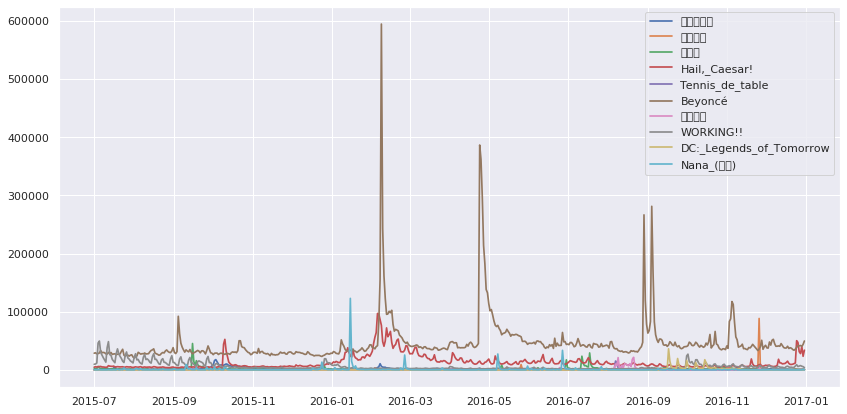

In [5]:
plot_random_series(df,10) 
## random series for random pages 

In [6]:
# lets find a specific page and use it for ourt models 
AI = find_page(df,'Artificial_intelligence')
AI

,count
Date,
2015-07-01,8689.0
2015-07-02,8670.0
2015-07-03,7112.0
2015-07-04,6717.0
2015-07-05,7052.0
...,...
2016-12-27,9587.0
2016-12-28,9837.0
2016-12-29,9598.0


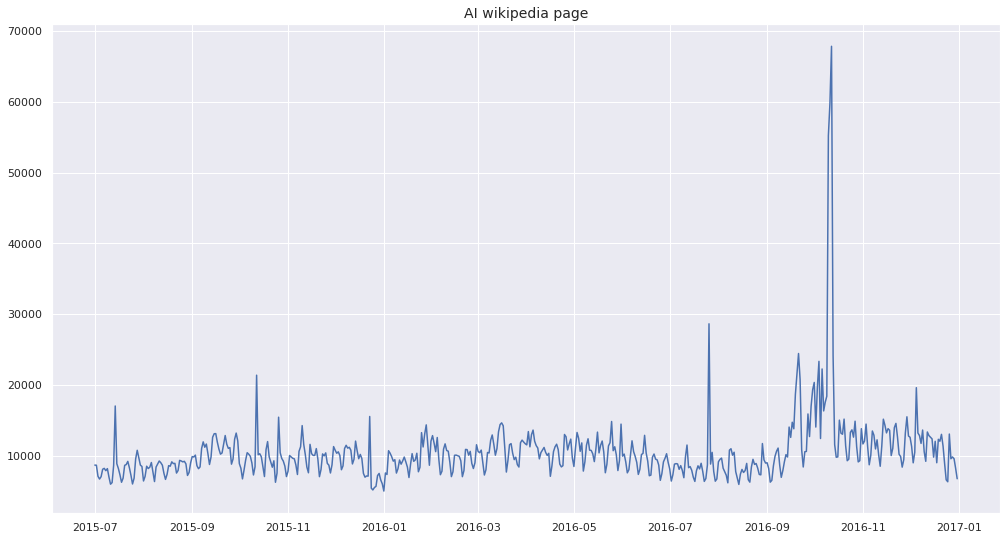

In [13]:
## plotting hte traffic on AI page 
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
plt.figure(figsize=(17, 9))
plt.plot(AI, color = 'b',linewidth=1.5)
plt.title('AI wikipedia page', fontsize = 14)
plt.show()

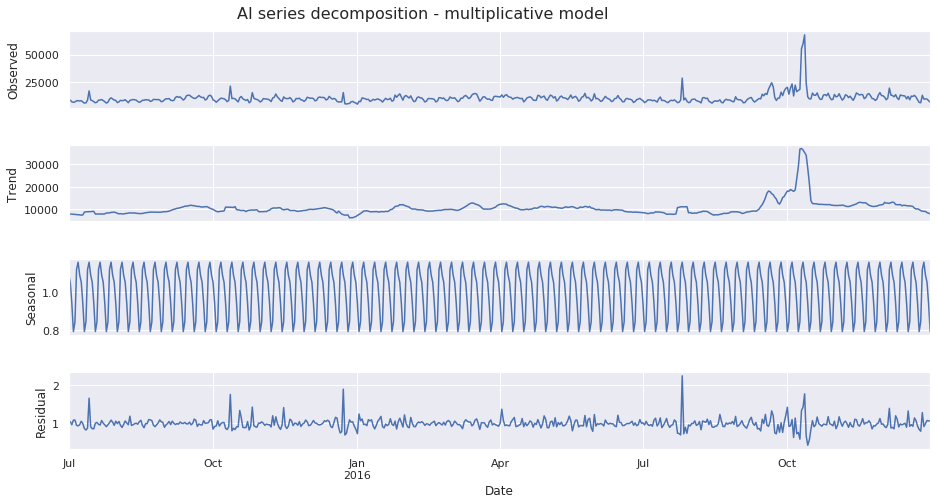

In [8]:
res1 = sm.tsa.seasonal_decompose(AI,freq=7, model = 'multiplicative', extrapolate_trend='freq')
# seasonal decompostion usin moving averaged for multiplicative model
fig = res1.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.suptitle('AI series decomposition - multiplicative model', fontsize = 16)
plt.show() 

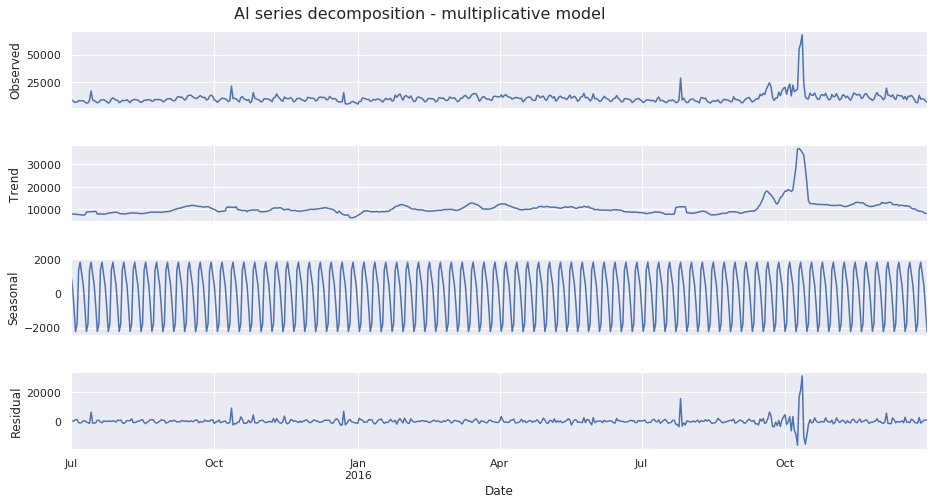

In [9]:
res = sm.tsa.seasonal_decompose(AI,freq=7, model = 'additive', extrapolate_trend='freq')
## for additive model
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.suptitle('AI series decomposition - multiplicative model', fontsize = 16)
plt.show()  

In [11]:
## multip;icative does a better job at capturing trend of the model 
#Here, instead of thinking of the seasonal component as adding to the trend, the seasonal component multiplies the trend.
df = pd.concat([res1.trend, res1.seasonal, res1.observed], axis=1)
df.columns = ['trend', 'seasonal', 'observed']
df = df.dropna()
df['pred'] = df['trend']*df['seasonal']
seasonal_coeff = df['seasonal']
df.head(8)  
## clasical approach (multiplying trend *seasonal to get to predictive values)

,trend,seasonal,observed,pred
Date,,,,
2015-07-01,7950.683673,1.089965,8689.0,8665.969650
2015-07-02,7887.892857,1.052182,8670.0,8299.501415
2015-07-03,7825.102041,0.941618,7112.0,7368.258029
2015-07-04,7796.000000,0.794193,6717.0,6191.531858
2015-07-05,7683.428571,0.845579,7052.0,6496.945769
2015-07-06,7614.857143,1.119167,8105.0,8522.297471
2015-07-07,7598.428571,1.157295,8227.0,8793.621173
2015-07-08,7494.285714,1.089965,7901.0,8168.511693


In [9]:
## calculating smape error 
## clasical approach
def smape(A, F):
    A, F = np.array(A), np.array(F)
    return np.mean(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))*100

In [10]:
print('Classical multiplicative model SMAPE:{:10.4f}'.format(smape(df['observed'],df['pred']))) 

Classical multiplicative model SMAPE:    8.5604


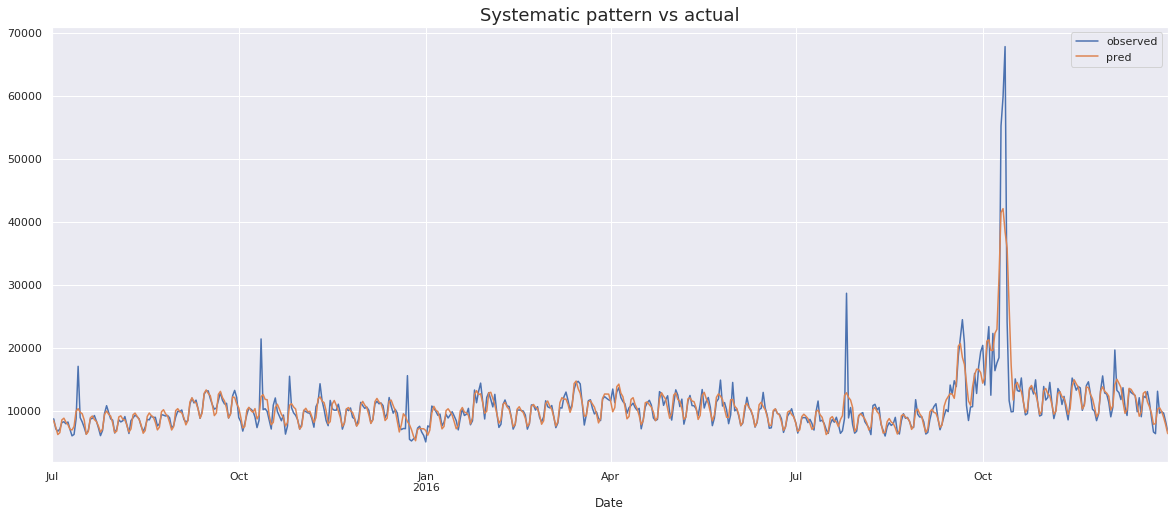

In [11]:
df[['observed','pred']].plot(figsize=(20, 8))
plt.title('Systematic pattern vs actual', fontsize = 18)
plt.show() 
## this was the classical approach with an erorr of 8.5% 

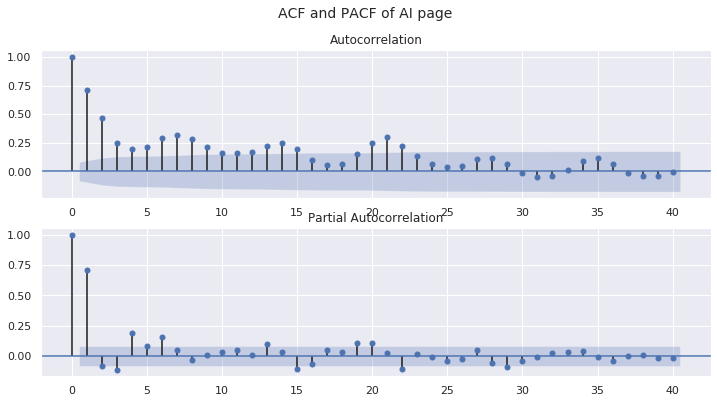

In [12]:
## acf and pacf plots  
# acf helps explain the complete corelation of the model (direct + indirect )
## pcf only explaind the partial (direct) ,which is why it is used to single out features for arima model ,using confidence intervals 
fig, ax = plt.subplots(2, figsize=(12,6))

ax[0] = plot_acf(AI['count'], lags = 40, ax=ax[0])
ax[1] = plot_pacf(AI['count'],lags = 40, ax=ax[1])
fig.suptitle('ACF and PACF of AI page', fontsize = 14)
plt.show() 

In [12]:
# deseasonalized the data to understand the general secular trend of the data by remiving the season componenet 
df['deseasonalized'] = df['observed']/df['seasonal']
df.head() 

,trend,seasonal,observed,pred,deseasonalized
Date,,,,,
2015-07-01,7950.683673,1.089965,8689.0,8665.969650,7971.813106
2015-07-02,7887.892857,1.052182,8670.0,8299.501415,8240.016798
2015-07-03,7825.102041,0.941618,7112.0,7368.258029,7552.955596
2015-07-04,7796.000000,0.794193,6717.0,6191.531858,8457.637496
2015-07-05,7683.428571,0.845579,7052.0,6496.945769,8339.847709


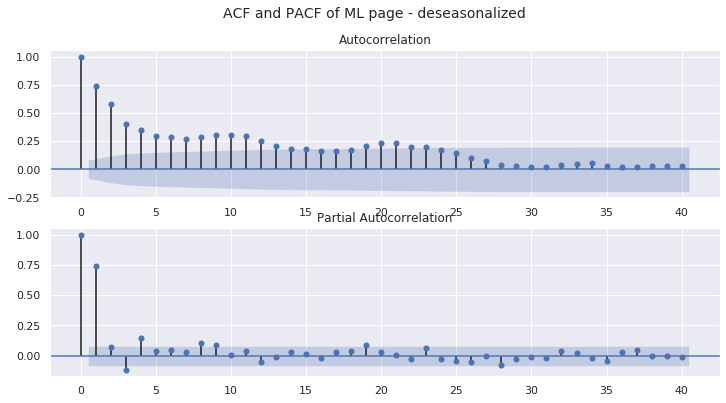

In [14]:
fig, ax = plt.subplots(2, figsize=(12,6))

ax[0] = plot_acf(df['deseasonalized'], lags = 40, ax=ax[0])
ax[1] = plot_pacf(df['deseasonalized'],lags = 40, ax=ax[1])
fig.suptitle('ACF and PACF of ML page - deseasonalized', fontsize = 14)
plt.show() 
## what we did here is we are looking at the trend only and nothing else 

Q by deseasonalized do we get better p,q values for our arima model?? 

now that we have the deseasonalized values lets check for trends /root value using augmented dick fuller test 

In [15]:




result = adfuller(df['observed'].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) 
    ## the p values is less that 0.05 that means we can rejeact the null hypothessis and the series is stationary and can be used for modellin
    # it is very important to make sure that the seriez is stationary  

NameError: name 'adfuller' is not defined

In [19]:
# adf test on raw data 
result = adfuller(df['deseasonalized'].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) 

ADF Statistic: -4.236883
p-value: 0.000570
Critical Values:
	1%: -3.442
	5%: -2.867
	10%: -2.570


In [18]:
## lets calculate p,q values iewe eant to find out the  best order for our arma model 
size = int(0.66*len(df['deseasonalized']))
resDiff = sm.tsa.arma_order_select_ic(df['deseasonalized'][:size],\
                                     max_ar=10, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.') 

ARMA(p,q) = (5, 2) is the best.


In [ ]:
# p,q order for raw data instaed of onbserved values 
size = int(0.66*len(df['observed']))
resDiff = sm.tsa.arma_order_select_ic(df['observed'][:size],\
                                     max_ar=10, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.') 


In [9]:
size = int(0.66*len(df['deseasonalized'])) 
len(df['deseasonalized']) 
size

363

In [35]:
size = int(0.66*len(df['deseasonalized'])) 
## fitting accordign to the size 
# d = 0 beacuse the series is stationary so no need to further diffrence 
# size is 66% of the toatl dataset 

from statsmodels.tsa.arima_model import ARIMA
train = df['deseasonalized'][0:size]
test = df['deseasonalized'][size:]
model = ARIMA(train, order=(5,0,2))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps = len(test))
pred = output[0] 
pred2 = output[2]  
## how does pred values differ from fitted values ?????? ask 
## are pred and forcast same ? 


In [18]:
test_forcast = model_fit.forecast(steps = 3) 


In [38]:
test
start_index = '2016-06-28'
end_index = '2016-12-31'
forecast = model_fit.predict(start=start_index, end=end_index) 
forecast 

2016-06-28    8915.452367
2016-06-29    9256.075714
2016-06-30    9173.697383
2016-07-01    9114.932091
2016-07-02    9016.043906
                 ...     
2016-12-27    9711.230957
2016-12-28    9711.230981
2016-12-29    9711.231118
2016-12-30    9711.231264
2016-12-31    9711.231327
Freq: D, Length: 187, dtype: float64

In [42]:
model_fit.fittedvalues

Date
2015-07-01    9711.231165
2015-07-02    8786.652722
2015-07-03    8727.925621
2015-07-04    8336.114628
2015-07-05    8600.587467
                 ...     
2016-06-23    9001.398576
2016-06-24    8832.317672
2016-06-25    8832.574679
2016-06-26    8686.042527
2016-06-27    9066.364319
Length: 363, dtype: float64

In [19]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:         deseasonalized   No. Observations:                  363
Model:                     ARMA(5, 2)   Log Likelihood               -3125.589
Method:                       css-mle   S.D. of innovations           1326.162
Date:                Mon, 02 Dec 2019   AIC                           6269.178
Time:                        22:46:50   BIC                           6304.228
Sample:                    07-01-2015   HQIC                          6283.110
                         - 06-27-2016                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 9711.2312    293.119     33.131      0.000    9136.728    1.03e+04
ar.L1.deseasonalized     1.6304      0.092     17.782      0.000       1.451       1.810
ar.L2.deseas

In [16]:
new = pd.DataFrame(
    {'actual': train,
    'fitted': model_fit.fittedvalues} 
     )
new

,actual,fitted
Date,,
2015-07-01,7971.813106,9711.231165
2015-07-02,8240.016798,8786.652722
2015-07-03,7552.955596,8727.925621
2015-07-04,8457.637496,8336.114628
2015-07-05,8339.847709,8600.587467
...,...,...
2016-06-23,8958.523453,9001.398576
2016-06-24,9225.608164,8832.317672
2016-06-25,8228.474175,8832.574679


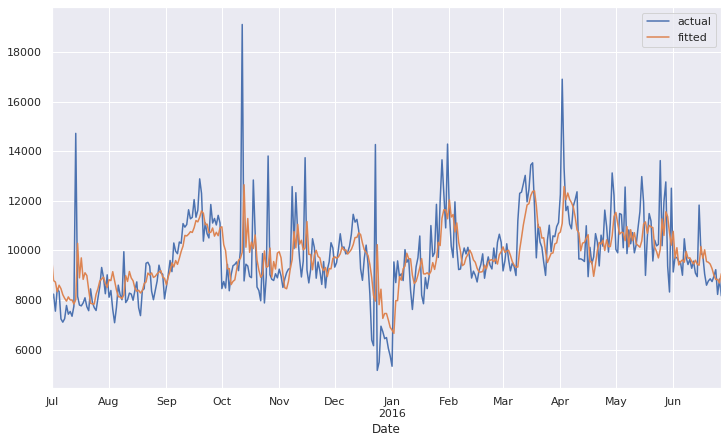

In [21]:
new.plot(figsize = (12,7) ) 

In [48]:
print('Classical multiplicative model SMAPE:{:10.4f}'.format(smape(new['actual'],new['fitted']))) 

Classical multiplicative model SMAPE:    9.0188


In [21]:
def plot_arima(train, test, predictions, title):
    plt.figure(figsize=(17, 9))
    titles = ['prediction', 'reality']
    plt.plot(test.index, predictions, color='orange', linewidth=1.5)
    plt.plot(test.index, test, color='b', linewidth=1.5)
    plt.plot(train.index, train, color='b', linewidth=1.5)
    plt.legend(titles)
    plt.ylabel('Series')
    plt.title('Performance of predictions - Benchmark Predictions vs Reality ' + title)
    plt.show() 
    

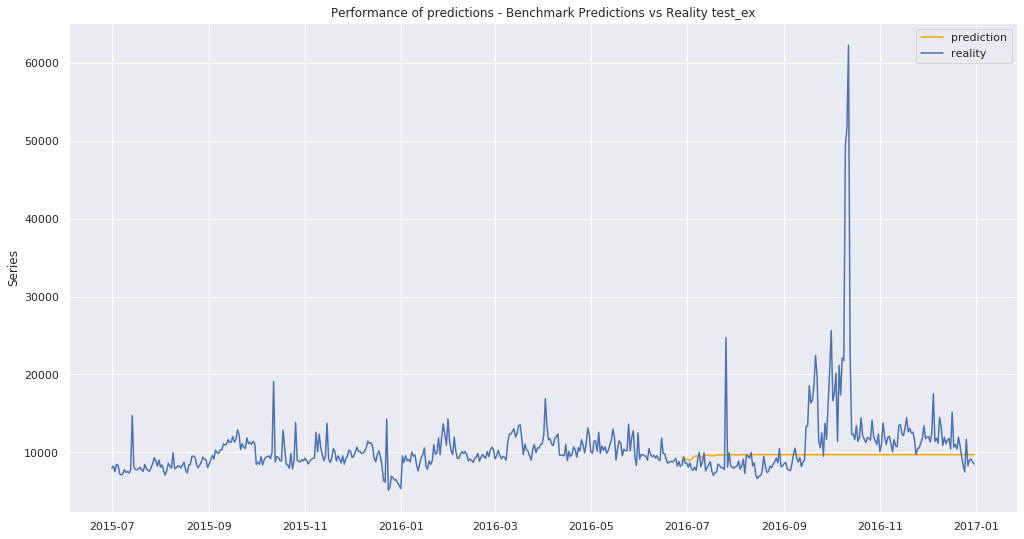

In [23]:
plot_arima(train, test, pred,'test_ex') 

In [36]:
def rolling_forecast(train, test, model_name, p, d, q):
    history = [x for x in train]
    predictions = list()
    output = []
    for t in range(len(test)):
        model = model_name(history, order=(p, d, q))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        history = history[1:]

    return predictions

In [31]:

history = [x for x in train]
train


Date
2015-07-01    7971.813106
2015-07-02    8240.016798
2015-07-03    7552.955596
2015-07-04    8457.637496
2015-07-05    8339.847709
                 ...     
2016-06-23    8958.523453
2016-06-24    9225.608164
2016-06-25    8228.474175
2016-06-26    8849.557630
2016-06-27    8167.681236
Name: deseasonalized, Length: 363, dtype: float64

In [32]:
history

[7971.81310647701,
 8240.016797669066,
 7552.955596385752,
 8457.637495907762,
 8339.847709152056,
 7241.992825546987,
 7108.8202032130985,
 7248.854339311181,
 7783.822096068011,
 7430.82540887389,
 7539.725074511789,
 7347.628164628718,
 7753.087198923036,
 14722.265543010182,
 8152.552798268467,
 7799.9789917497155,
 7766.417924123876,
 7884.729194487779,
 8092.679789240998,
 7734.323244655733,
 7571.969301173743,
 8452.562337434998,
 7907.374827751631,
 7697.387818138911,
 7580.017526479787,
 8078.488329724573,
 8546.534407940399,
 9314.827007492064,
 8911.292519646817,
 8255.223287722436,
 9018.517846528095,
 8115.151654179773,
 8385.969952580435,
 7622.633040683695,
 7087.218099763441,
 7698.409917878765,
 8602.121342064904,
 8211.396607319268,
 8010.6431068877755,
 9950.57836426622,
 7900.518268166127,
 8009.195874994799,
 8280.997249287777,
 8242.868014554073,
 7992.624271428455,
 8395.939678831764,
 8733.660710732831,
 7695.008292857576,
 7373.229949436899,
 8395.679794840731,

In [33]:
for t in range(len(test)):
    print(t)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186


In [34]:
test[89]

12503.858455596239

In [37]:
predictions = rolling_forecast(train, test, ARIMA, 1,0,0)
predictions = pd.DataFrame(predictions)
 

In [47]:
predictions
smape_roll = smape(test,predictions[0])
print ("ARIMA ROLLING FORECAST model smape:{:10.4f}".format(smape_roll)) 


ARIMA ROLLING FORECAST model smape:   14.8958


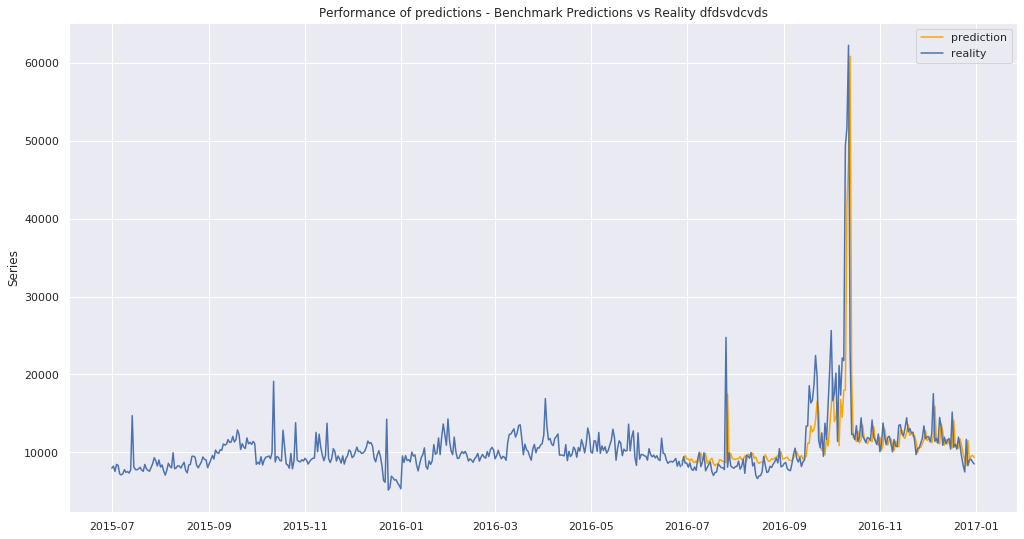

In [49]:
plot_arima(train, test, predictions,'dfdsvdcvds')


In [14]:
## fitting on deseasonlised dataset 
df

,trend,seasonal,observed,pred,deseasonalized
Date,,,,,
2015-07-01,7950.683673,1.089965,8689.0,8665.969650,7971.813106
2015-07-02,7887.892857,1.052182,8670.0,8299.501415,8240.016798
2015-07-03,7825.102041,0.941618,7112.0,7368.258029,7552.955596
2015-07-04,7796.000000,0.794193,6717.0,6191.531858,8457.637496
2015-07-05,7683.428571,0.845579,7052.0,6496.945769,8339.847709
...,...,...,...,...,...
2016-12-27,9041.142857,1.157295,9587.0,10463.266781,8283.974631
2016-12-28,9063.000000,1.089965,9837.0,9878.355896,9025.057605
2016-12-29,8483.994898,1.052182,9598.0,8926.709444,9121.993221


In [15]:
train1 = df['observed'][0:size]
test1 = df['observed'][size:]
model2 = ARIMA(train1, order=(5,0,5))
model_fit1 = model2.fit(disp=1)
output = model_fit1.forecast(steps = len(test1))
pred_seasonal1 = output[0] 


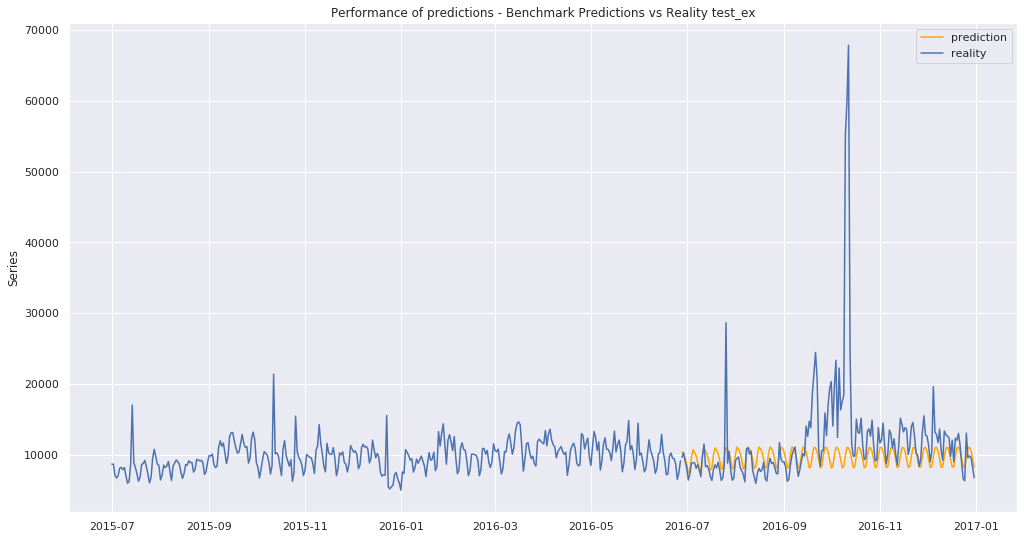

In [21]:
plot_arima(train1, test1,pred_seasonal1 ,'test_ex') 

In [22]:
# sarima 
new2 = pd.DataFrame(
    {'actual': train1,
    'fitted': model_fit1.fittedvalues} 
     )
new2

,actual,fitted
Date,,
2015-07-01,8689.0,9745.565138
2015-07-02,8670.0,9198.087489
2015-07-03,7112.0,9223.078716
2015-07-04,6717.0,8392.658742
2015-07-05,7052.0,8209.173818
...,...,...
2016-06-23,9426.0,9586.803217
2016-06-24,8687.0,8722.331380
2016-06-25,6535.0,7411.099051


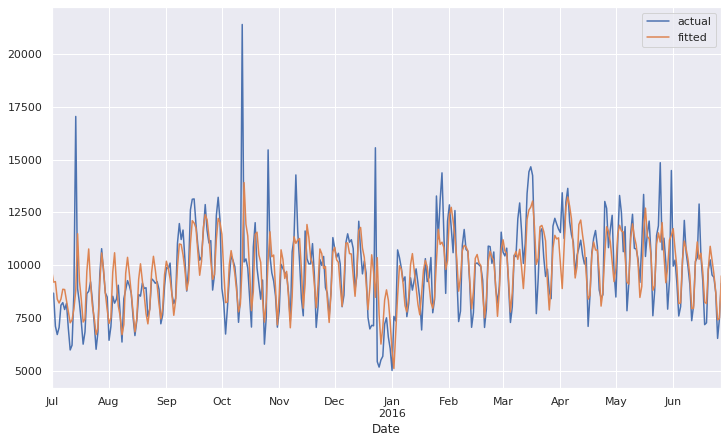

In [25]:
new2.plot(figsize = (12,7) )

In [14]:
# aic 
p = d = q = range(7, 9)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4])) 

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (7, 7, 8) x (7, 7, 8, 12)
SARIMAX: (7, 7, 8) x (7, 8, 7, 12)
SARIMAX: (7, 8, 7) x (7, 8, 8, 12)
SARIMAX: (7, 8, 7) x (8, 7, 7, 12)


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(5, 5, 5)x(5, 5, 5, 12)12 - AIC:6529.241173307184
ARIMA(5, 5, 5)x(5, 5, 6, 12)12 - AIC:8365.038302977477
ARIMA(5, 5, 5)x(5, 6, 5, 12)12 - AIC:7272.754021841279
ARIMA(5, 5, 5)x(5, 6, 6, 12)12 - AIC:nan
ARIMA(5, 5, 5)x(6, 5, 5, 12)12 - AIC:6335.76871532542
ARIMA(5, 5, 5)x(6, 5, 6, 12)12 - AIC:8142.662808458005
ARIMA(5, 5, 5)x(6, 6, 5, 12)12 - AIC:6230.398199891975
ARIMA(5, 5, 5)x(6, 6, 6, 12)12 - AIC:nan
ARIMA(5, 5, 6)x(5, 5, 5, 12)12 - AIC:6872.097808314324
ARIMA(5, 5, 6)x(5, 5, 6, 12)12 - AIC:8447.332449422394
ARIMA(5, 5, 6)x(5, 6, 5, 12)12 - AIC:7231.503362645377
ARIMA(5, 5, 6)x(5, 6, 6, 12)12 - AIC:nan
ARIMA(5, 5, 6)x(6, 5, 5, 12)12 - AIC:6121.711286941165
ARIMA(5, 5, 6)x(6, 5, 6, 12)12 - AIC:8124.715194873601
ARIMA(5, 5, 6)x(6, 6, 5, 12)12 - AIC:6329.654197871019
ARIMA(5, 5, 6)x(6, 6, 6, 12)12 - AIC:nan
ARIMA(5, 6, 5)x(5, 5, 5, 12)12 - AIC:7063.725691382768


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(7, 7, 7)x(7, 7, 7, 12)12 - AIC:nan
ARIMA(7, 7, 7)x(7, 8, 7, 12)12 - AIC:11193.359666931685
ARIMA(7, 7, 7)x(8, 7, 7, 12)12 - AIC:nan
ARIMA(7, 7, 7)x(8, 8, 7, 12)12 - AIC:5831.011370770573
ARIMA(7, 7, 8)x(7, 7, 7, 12)12 - AIC:nan
ARIMA(7, 7, 8)x(7, 8, 7, 12)12 - AIC:11176.448428821823
ARIMA(7, 7, 8)x(8, 7, 7, 12)12 - AIC:nan
ARIMA(7, 7, 8)x(8, 8, 7, 12)12 - AIC:5830.302164452485
ARIMA(7, 8, 7)x(7, 7, 7, 12)12 - AIC:12508.361403739415
ARIMA(7, 8, 7)x(7, 8, 7, 12)12 - AIC:7814.553490735609
ARIMA(7, 8, 7)x(8, 7, 7, 12)12 - AIC:11542.992278066973
ARIMA(7, 8, 7)x(8, 8, 7, 12)12 - AIC:7358.239852482278
ARIMA(7, 8, 8)x(7, 7, 7, 12)12 - AIC:12509.176399678408
ARIMA(7, 8, 8)x(7, 8, 7, 12)12 - AIC:8591.411645336177
ARIMA(7, 8, 8)x(8, 7, 7, 12)12 - AIC:nan
ARIMA(7, 8, 8)x(8, 8, 7, 12)12 - AIC:7412.882447179385
ARIMA(8, 7, 7)x(7, 7, 7, 12)12 - AIC:nan
ARIMA(8, 7, 7)x(7, 8, 7, 12)12 - AIC:10713.074669846366
ARIMA(8, 7, 7)x(8, 7, 7, 12)12 - AIC:nan


In [34]:
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4])) 

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [38]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['observed'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:11826.556807662895
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:11336.046440147356
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:10895.373111686173
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:10472.264587439913
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:10878.88681877765
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:10714.226928152915
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:10572.481373208764
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:10463.880151253441
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:11303.02608408829
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:11131.06991230579
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:10677.264544589938
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:10256.861449623124
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:10662.787929718677
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:11047.797706048708
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:10381.933009113143
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:10258.682387532932
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:10533.415154723903
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:10307.55671469

In [28]:
p = d = q = range(2, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(2, 2, 2)x(2, 2, 2, 12)12 - AIC:5997.678297622306
ARIMA(2, 2, 2)x(2, 2, 3, 12)12 - AIC:5768.066736119887
ARIMA(2, 2, 2)x(2, 3, 2, 12)12 - AIC:6527.417372610265
ARIMA(2, 2, 2)x(2, 3, 3, 12)12 - AIC:6237.276893969347
ARIMA(2, 2, 2)x(3, 2, 2, 12)12 - AIC:5781.038908892316
ARIMA(2, 2, 2)x(3, 2, 3, 12)12 - AIC:5769.284137442366
ARIMA(2, 2, 2)x(3, 3, 2, 12)12 - AIC:6261.483711494396
ARIMA(2, 2, 2)x(3, 3, 3, 12)12 - AIC:6238.155704384638
ARIMA(2, 2, 3)x(2, 2, 2, 12)12 - AIC:5858.343360258686
ARIMA(2, 2, 3)x(2, 2, 3, 12)12 - AIC:5634.049801388492
ARIMA(2, 2, 3)x(2, 3, 2, 12)12 - AIC:6274.255969478616
ARIMA(2, 2, 3)x(2, 3, 3, 12)12 - AIC:6079.648539010153
ARIMA(2, 2, 3)x(3, 2, 2, 12)12 - AIC:5659.353014233508
ARIMA(2, 2, 3)x(3, 2, 3, 12)12 - AIC:5623.438833083055
ARIMA(2, 2, 3)x(3, 3, 2, 12)12 - AIC:6120.236031717419
ARIMA(2, 2, 3)x(3, 3, 3, 12)12 - AIC:6077.464487313258
ARIMA(2, 3, 2)x(2, 2, 2, 12)12 - AIC:6155.668565403152
ARIMA(2, 3, 2)x(2, 2, 3, 12)12 - AIC:5919.478654876779
ARIMA(2, 3

In [31]:
# Set variables to populate
lowest_aic = None
lowest_parm = None
lowest_param_seasonal = None
# GridSearch the hyperparameters of p, d, q and P, D, Q, m
for param in param_grid:
    for param_seasonal in seasonal_param_grid:
        try:
            mdl = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=True, enforce_invertibility=True)
results = mdl.fit()
            
            # Store results
            current_aic = results.aic
            # Set baseline for aic
            if (lowest_aic == None):
                lowest_aic = results.aic
            # Compare results
            if (current_aic <= lowest_aic):
                lowest_aic = current_aic
                lowest_parm = param
                lowest_param_seasonal = param_seasonal
print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            
print('The best model is: SARIMA{}x{} - AIC:{}'.format(lowest_parm, lowest_param_seasonal, lowest_aic))


IndentationError: unexpected unindent (<ipython-input-31-3658cde54cac>, line 10)

In [37]:
df['observed']

Date
2015-07-01    8689.0
2015-07-02    8670.0
2015-07-03    7112.0
2015-07-04    6717.0
2015-07-05    7052.0
               ...  
2016-12-27    9587.0
2016-12-28    9837.0
2016-12-29    9598.0
2016-12-30    8251.0
2016-12-31    6759.0
Name: observed, Length: 550, dtype: float64

In [1]:

adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(df['observed'])
train1 = df['observed'][0:size]
test1 = df['observed'][size:]
train1.shape
test1.shape
plt.plot(train)
plt.plot(test)
plt.title("Training and Test Data")
plt.show()

NameError: name 'ADFTest' is not defined

In [57]:
 Arima_model=auto_arima(train1, start_p=1, start_q=1, max_p=8, max_q=8, start_P=0, start_Q=0, max_P=8, max_Q=8, m=12, seasonal=True, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=6519.152, BIC=6534.584, Fit time=0.438 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=6629.393, BIC=6637.108, Fit time=0.023 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=6525.531, BIC=6540.962, Fit time=0.587 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=6326.440, BIC=6341.872, Fit time=0.768 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=6320.328, BIC=6339.618, Fit time=1.628 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=6502.336, BIC=6517.768, Fit time=1.103 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=6379.863, BIC=6403.011, Fit time=3.986 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=6581.928, BIC=6593.502, Fit time=0.274 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=6349.494, BIC=6376.500, Fit time=3.863 seconds
Fit ARIMA: order=(1, 1, 1) s

In [17]:
p = d = q = range(0, 2) 

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 2) for x in list(itertools.product(p, d, q))]

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 2)12 - AIC:7694.970841408089
ARIMA(0, 0, 0)x(0, 0, 1, 2)12 - AIC:7290.752472600048
ARIMA(0, 0, 0)x(0, 1, 0, 2)12 - AIC:6692.021631574843
ARIMA(0, 0, 0)x(0, 1, 1, 2)12 - AIC:6472.803526378122
ARIMA(0, 0, 0)x(1, 0, 0, 2)12 - AIC:6705.5983908974595
ARIMA(0, 0, 0)x(1, 0, 1, 2)12 - AIC:6518.381487080206
ARIMA(0, 0, 0)x(1, 1, 0, 2)12 - AIC:6604.481574360593
ARIMA(0, 0, 0)x(1, 1, 1, 2)12 - AIC:6473.730762931048
ARIMA(0, 0, 1)x(0, 0, 0, 2)12 - AIC:7431.881644594045
ARIMA(0, 0, 1)x(0, 0, 1, 2)12 - AIC:7320.431814065542
ARIMA(0, 0, 1)x(0, 1, 0, 2)12 - AIC:6519.69878106744
ARIMA(0, 0, 1)x(0, 1, 1, 2)12 - AIC:6365.107412745246
ARIMA(0, 0, 1)x(1, 0, 0, 2)12 - AIC:6604.304349787193
ARIMA(0, 0, 1)x(1, 0, 1, 2)12 - AIC:7284.456650075026
ARIMA(0, 0, 1)x(1, 1, 0, 2)12 - AIC:6500.5930328814375
ARIMA(0, 0, 1)x(1, 1, 1, 2)12 - AIC:6365.950543987225
ARIMA(0, 1, 0)x(0, 0, 0, 2)12 - AIC:6536.494322103508
ARIMA(0, 1, 0)x(0, 0, 1, 2)12 - AIC:6481.7327634813555
ARIMA(0, 1, 0)x(0, 1, 0, 2

In [34]:
# define helper plot function for visualization
import statsmodels.tsa.api as smt

def plots(data, lags=None):
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    figsize=(12,6)
    data.plot(ax=raw)
    smt.graphics.plot_acf(data, lags=lags, ax=acf,)
    smt.graphics.plot_pacf(data, lags=lags, ax=pacf)
    sns.despine()
    plt.tight_layout() 

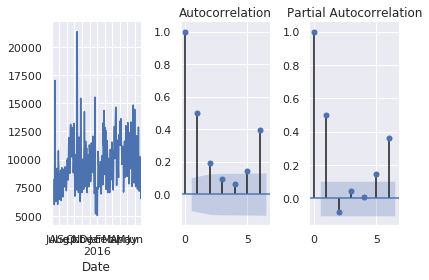

In [35]:
plots(train1, lags=6);


In [36]:
# we might need to install dev version for statespace functionality
#!pip install git+https://github.com/statsmodels/statsmodels.git
import statsmodels.api as sm

# fit SARIMA monthly based on helper plots
sar = sm.tsa.statespace.SARIMAX(df['observed'], 
                                order=(1,1,0), 
                                seasonal_order=(0,1,0,12), 
                                trend='c').fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                           observed   No. Observations:                  550
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -5366.263
Date:                            Thu, 05 Dec 2019   AIC                          10738.526
Time:                                    20:38:35   BIC                          10751.384
Sample:                                07-01-2015   HQIC                         10743.556
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -26.1150    228.942     -0.114      0.909    -474.834     422.604
ar.L1         -0.0792      0.024     -3.269      0.001      -0.127      -0.032
sigma2      2.795e+07   4.43e+05     63.155      0.000    2.71e+07    2.88e+07
===================================================================================
Ljung-Box (Q):                      446.32   Jarque-Bera (JB):             19062.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.68   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
warnings.filterwarnings(action='ignore')

# autoselect for monthly, limited to only searching AR and MA parameters: UPDATE MAX_AR AND MA
autores = sm.tsa.arma_order_select_ic(train1, 
                                      ic=['aic', 'bic'], 
                                      trend='c', 
                                      max_ar=4, 
                                      max_ma=4, 
                                      fit_kw=dict(method='css-mle'))

print('AIC', autores.aic_min_order) # will use this as inputs for annual
print('BIC', autores.bic_min_order)


AIC (3, 3)
BIC (3, 3)


In [ ]:
#set parameter range; feel free to update these!
p = q = range(0, 3)
d = range(0, 3)
season = 12

# list of all parameter combos
pdq = list(itertools.product(p, d, q))
# same for seasonal variant
seasonal_pdq = [(x[0], x[1], x[2], season) for x in list(itertools.product(p, d, q))] 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7694.970841408089
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:7238.297043738755
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:6942.767293751924
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:6570.892796874398
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:6218.913282977579
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:5962.041014442481
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:6704.78396225279
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:6209.160796082284
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:5836.572910967072
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:6584.567005011964
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6483.803125474595
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:6214.917115425289
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:6292.565748313982
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6214.312394237873
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:5945.594812013687
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:6343.333159093948
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:6152.78700176798
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:5835.073749896422
ARIMA(0, 0, 

ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:5760.090365267184
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:6284.086215806609
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:5947.650398828606
ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:5633.326023680613
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:5991.113210185267
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:5992.787433515046
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:5909.524648007278
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:5896.770412443624
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:5815.73753605594
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:5756.66089291252
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:5918.919695684165
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:5716.245814171803
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:5605.245595153201
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:6831.245193763792
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:6582.813002032379
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:6364.762882333302
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:6869.500082743514
ARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:6449.429258556149
ARIMA(0, 2, 

In [55]:
#ARIMA(2, 2, 3)x(3, 2, 3, 12)12 - AIC:5623.438833083055
# selecting this order because of lowest aic value 


train1 = df['observed'][0:size]
test1 = df['observed'][size:]
mod = sm.tsa.statespace.SARIMAX(train1,
                                order=(5,2,5),
                                seasonal_order=(3, 2, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_fit2 = mod.fit(disp=1)
output = model_fit2.forecast(steps = len(test1))
pred_seasonal2 = output[0] 



In [37]:
new3 = pd.DataFrame(
    {'actual': train1,
    'fitted': model_fit1.fittedvalues} 
     )
new3

,actual,fitted
Date,,
2015-07-01,8689.0,0.000000
2015-07-02,8670.0,15336.272166
2015-07-03,7112.0,17221.947322
2015-07-04,6717.0,14726.281680
2015-07-05,7052.0,10539.412537
...,...,...
2016-06-23,9426.0,9277.170655
2016-06-24,8687.0,7979.286370
2016-06-25,6535.0,7753.480274


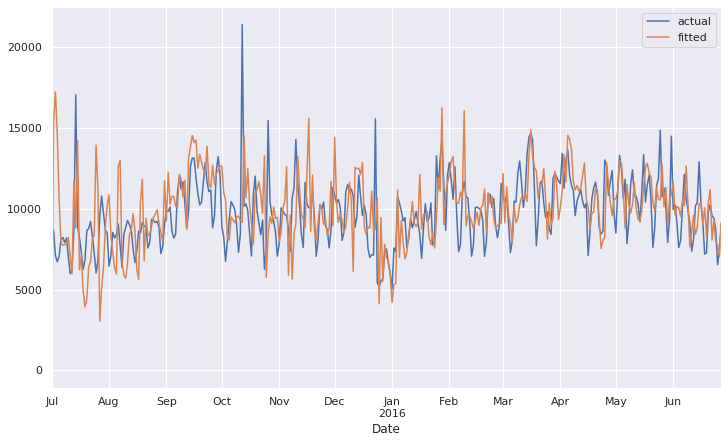

In [49]:
new3.plot(figsize = (12,7) ) 

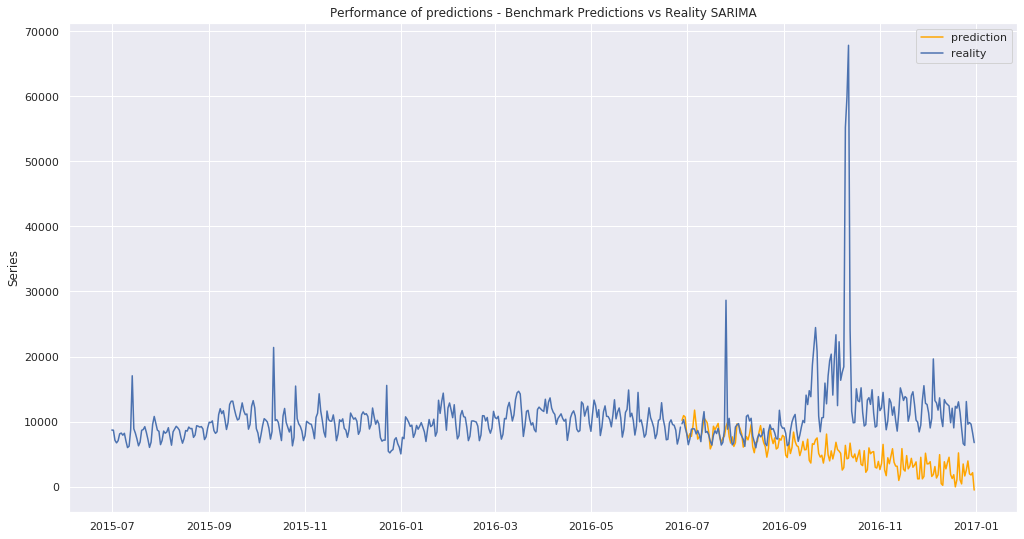

In [57]:
plot_arima(train1, test1,output ,'SARIMA') 